In [1]:
#imports
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize
from astropy.visualization import ZScaleInterval
import numpy as np 
from astropy.io import fits
from astropy.table import Table
import astropy.units as u
import os
import glob
z = ZScaleInterval()

In [2]:
direc_name = 'Palomar_Data/Calibrations/'
directory = os.listdir(direc_name)
ordered = sorted(directory)
dark_flats = []
for i in ordered[:11]:
    dark_flats.append(direc_name + i)
helium = [direc_name + ordered[11]]
flats = []
for i in ordered[12:23]:
    flats.append(direc_name + i)
darks = []
for i in ordered[23:-5]:
    darks.append(direc_name + i)
dithering = []
for i in ordered[-5:]:
    dithering.append(direc_name + i)

In [3]:
science_direc = 'Palomar_Data/Science/'
directory = sorted(os.listdir(science_direc))
science_files = []
for i in directory:
    science_files.append(science_direc+i)

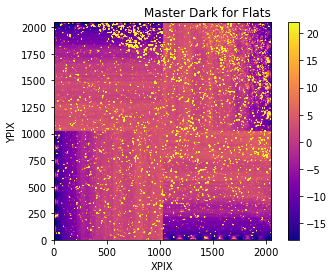

In [4]:
dark_flat_arrays = []
for dark in dark_flats:
    dark_data = fits.getdata(dark)
    dark_flat_arrays.append(dark_data)

master_flat_dark = np.median(dark_flat_arrays, axis=0)
vmin = np.percentile(master_flat_dark,1)
vmax = np.percentile(master_flat_dark,99)

fig, ax = plt.subplots()
cbar = ax.imshow(master_flat_dark, cmap="plasma", norm=Normalize(vmin=vmin, vmax=vmax), origin="lower")
ax.set_title("Master Dark for Flats", loc="right")
ax.set_xlabel("XPIX")
ax.set_ylabel("YPIX")
plt.colorbar(cbar);

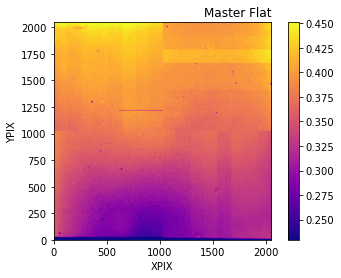

In [5]:
flat_arrays = []
for flat in flats:
    flat_data = fits.getdata(flat)
    flat_exposure = fits.getheader(flat)["EXPTIME"]
    norm_flat_data = (flat_data - master_flat_dark) / flat_exposure
    flat_arrays.append(norm_flat_data)

master_flat = np.median(flat_arrays, axis=0)
master_flat /= np.max(master_flat)
vmin = np.percentile(master_flat,1)
vmax = np.percentile(master_flat,99)

fig, ax = plt.subplots()
cbar = ax.imshow(master_flat, cmap="plasma", norm=Normalize(vmin=vmin, vmax=vmax), origin="lower")
ax.set_title("Master Flat", loc="right")
ax.set_xlabel("XPIX")
ax.set_ylabel("YPIX")
plt.colorbar(cbar);
plt.show()

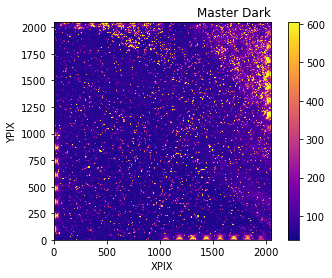

In [6]:
dark_arrays = []
for dark in darks:
    dark_data = fits.getdata(dark)
    #dark_exposure = fits.getheader(dark)["EXPTIME"]
    norm_dark_data = dark_data# / flat_exposure
    dark_arrays.append(norm_dark_data)

master_dark = np.median(dark_arrays, axis=0)
#master_flat /= np.max(master_flat)
vmin = np.percentile(master_dark,1)
vmax = np.percentile(master_dark,99)

fig, ax = plt.subplots()
cbar = ax.imshow(master_dark, cmap="plasma", norm=Normalize(vmin=vmin, vmax=vmax), origin="lower")
ax.set_title("Master Dark", loc="right")
ax.set_xlabel("XPIX")
ax.set_ylabel("YPIX")
plt.colorbar(cbar);
plt.show()

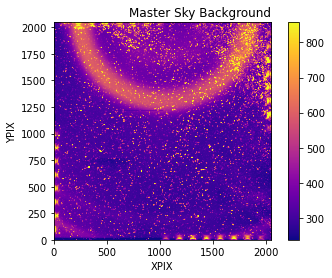

In [7]:
dither_arrays = []
for dither in dithering:
    dither_data = fits.getdata(dither)
    dither_exposure = fits.getheader(dither)["EXPTIME"]
    norm_dither_data = (dither_data - master_flat_dark)
    dither_arrays.append(norm_dither_data)

master_sky = np.median(dither_arrays, axis=0)
vmin = np.percentile(master_sky,1)
vmax = np.percentile(master_sky,99)

fig, ax = plt.subplots()
cbar = ax.imshow(master_sky, cmap="plasma", norm=Normalize(vmin=vmin, vmax=vmax), origin="lower")
ax.set_title("Master Sky Background", loc="right")
ax.set_xlabel("XPIX")
ax.set_ylabel("YPIX")
plt.colorbar(cbar);

/var/folders/09/ztsg875s7gzg1n270d08ngkc0000gn/T/ipykernel_21223/819382943.py:5: RuntimeWarning: invalid value encountered in true_divide
  red_science = np.divide((test_science - master_dark - master_sky), master_flat);


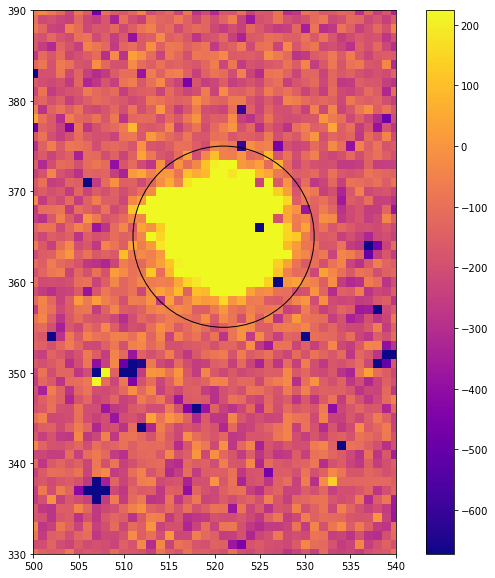

In [189]:
# changes - x_center to 753 to account for drift, circle becomes 9

test_science = fits.getdata(science_files[1])

red_science = np.divide((test_science - master_dark - master_sky), master_flat);
x_center = 521
y_center = 365
z1, z2 = z.get_limits(red_science)

fig, ax = plt.subplots()
fig.set_size_inches(11, 10)
cbar = ax.imshow(red_science, origin="lower",  norm=Normalize(z1,z2), cmap="plasma")
targ_circle = plt.Circle((x_center, y_center), 10, fill=False)
ax.add_patch(targ_circle)
ax.set_xlim(500, 540)
ax.set_ylim(330, 390)
plt.colorbar(cbar);

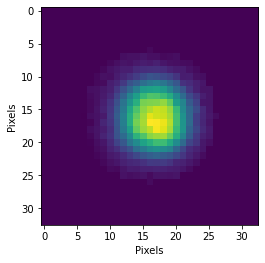

In [139]:
pix_length = 15
box_dim = int(pix_length+1)
subset = np.copy(red_science[y_center-box_dim:y_center+box_dim+1, x_center-box_dim:x_center+box_dim+1])
for i in range(box_dim*2+1):
        for j in range(box_dim*2+1):
            radius = (abs(i-box_dim)**2 + abs(j-box_dim)**2)**.5
            if radius > 10:
                subset[i,j]=0
            #elif radius < 14 and radius > 5:
            #    subset[i,j] = 0
            #else:
             #   subset[i,j] = 1
            
plt.imshow(subset,)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

/var/folders/09/ztsg875s7gzg1n270d08ngkc0000gn/T/ipykernel_21223/553184115.py:3: RuntimeWarning: invalid value encountered in true_divide
  red_science = np.divide((test_science - master_dark - master_sky), master_flat);


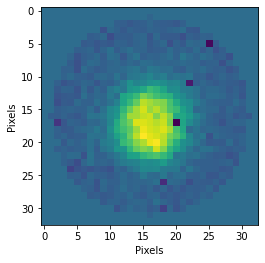

In [196]:
test_science = fits.getdata(science_files[2])

red_science = np.divide((test_science - master_dark - master_sky), master_flat);

pix_length = 15
box_dim = int(pix_length+1)
x_center = 521
y_center = 365
subset = np.copy(red_science[y_center-box_dim:y_center+box_dim+1, x_center-box_dim:x_center+box_dim+1])
for i in range(box_dim*2+1):
        for j in range(box_dim*2+1):
            radius = (abs(i-box_dim)**2 + abs(j-box_dim)**2)**.5
            if radius > 15:
                subset[i,j]=0
            #elif radius < 14 and radius > 5:
            #    subset[i,j] = 0
            #else:
             #   subset[i,j] = 1
            
plt.imshow(subset)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

/var/folders/09/ztsg875s7gzg1n270d08ngkc0000gn/T/ipykernel_21223/232071783.py:3: RuntimeWarning: invalid value encountered in true_divide
  red_science = np.divide((test_science - master_dark - master_sky), master_flat);


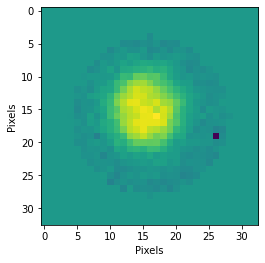

In [200]:
test_science = fits.getdata(science_files[0])

red_science = np.divide((test_science - master_dark - master_sky), master_flat);

pix_length = 15
box_dim = int(pix_length+1)
x_center = 515
y_center = 363
subset = np.copy(red_science[y_center-box_dim:y_center+box_dim+1, x_center-box_dim:x_center+box_dim+1])
for i in range(box_dim*2+1):
        for j in range(box_dim*2+1):
            radius = (abs(i-box_dim)**2 + abs(j-box_dim)**2)**.5
            if radius > 12:
                subset[i,j]=0
            #elif radius < 14 and radius > 5:
            #    subset[i,j] = 0
            #else:
             #   subset[i,j] = 1
            
plt.imshow(subset)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

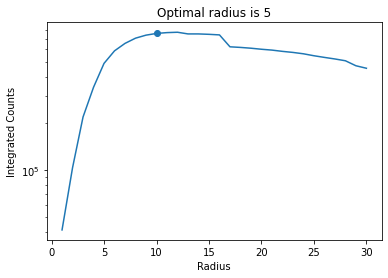

In [146]:
pixels = 30
rs = np.array([i+1 for i in range(pixels)])
counts = np.array([i+1 for i in range(pixels)])
for r in range(len(rs)):
    pix_length = rs[r]
    box_dim = int(pix_length+1)
    subset = np.copy(red_science[y_center-box_dim:y_center+box_dim+1, x_center-box_dim:x_center+box_dim+1])
    
    for i in range(box_dim*2+1):
        for j in range(box_dim*2+1):
            if (abs(i-box_dim)**2 + abs(j-box_dim)**2)**.5 > pix_length:
                subset[i,j]=0
    counts[r] = np.sum(subset)
    
plt.semilogy(rs, counts)
plt.scatter(rs[9], counts[9])
plt.title('Optimal radius is 5')
plt.xlabel('Radius')
plt.ylabel('Integrated Counts')
plt.show()

In [8]:
def aperture_mask(h, w, radius, x_target, y_target):
    """ 
    Code that generates aperture mask
    """
    
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - x_target)**2 + (Y-y_target)**2)

    mask = dist_from_center <= radius
    n_pix = np.sum(mask)
    return mask, n_pix

In [41]:
### THIS IS THE IMPORTANT CELL
### changed aperture to 10 pixels
### the x/y center coordinates are the ones for file 505
### code changes center to real one afterwards
### then error bars added in next cell

science_data = fits.open(science_files[0])
gain = science_data[0].header['DETGAIN']

height = len(master_flat)
width = len(master_flat[0])
x_center = 747
y_center = 1364


counts = []
errors = []
for science_file in science_files:
    science_data = fits.getdata(science_file)
    red_science = (science_data - master_dark - master_sky) / master_flat
    mask, n_pix = aperture_mask(height, width, 10, x_center, y_center)
    count = np.nansum(np.multiply(red_science, mask))
    counts.append(count)
    error = np.sqrt(np.nansum(np.multiply(red_science / gain, mask)**2))
    errors.append(error)
    x_center = 753
    y_center = 1367

/var/folders/09/ztsg875s7gzg1n270d08ngkc0000gn/T/ipykernel_31401/972477886.py:20: RuntimeWarning: invalid value encountered in true_divide
  red_science = (science_data - master_dark - master_sky) / master_flat


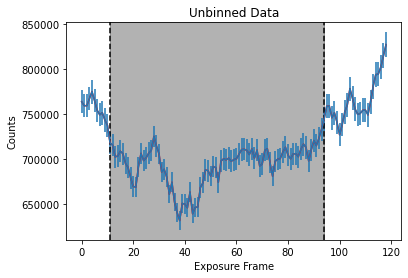

In [42]:
x = np.arange(len(science_files))
fig, ax = plt.subplots()
ax.axvline(11, linestyle="dashed", color="black")
ax.axvline(94, linestyle="dashed", color="black")
ax.axvspan(11, 94, color="black", alpha=0.3)
ax.plot(x, counts, color="red");
ax.errorbar(x, counts, yerr=errors)
ax.set_xlabel("Exposure Frame")
ax.set_ylabel("Counts")
ax.set_title('Unbinned Data');

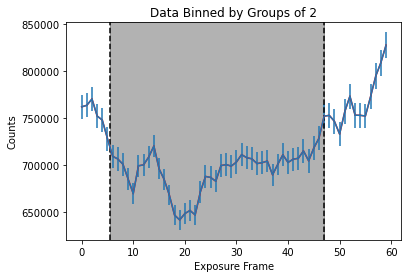

In [48]:
# binning by 2
counts2 = []
errors2 = []
for i in range(59):
    new_index = 2*i
    one = counts[new_index]
    two = counts[new_index+1]
    average = (one+two)/2
    counts2.append(average)
    err1 = errors[new_index]
    err2 = errors[new_index+1]
    new_err = ((err1**2 + err2**2)/2)**.5
    errors2.append(new_err)
counts2.append(counts[-1])
errors2.append(errors[-1])
x2 = np.arange(len(counts2))

fig, ax = plt.subplots()
ax.axvline(11/2, linestyle="dashed", color="black")
ax.axvline(94/2, linestyle="dashed", color="black")
ax.axvspan(11/2, 94/2, color="black", alpha=0.3)
ax.plot(x2, counts2, color="red");
ax.errorbar(x2, counts2, yerr=errors2)
ax.set_xlabel("Exposure Frame")
ax.set_ylabel("Counts");
ax.set_title('Data Binned by Groups of 2');

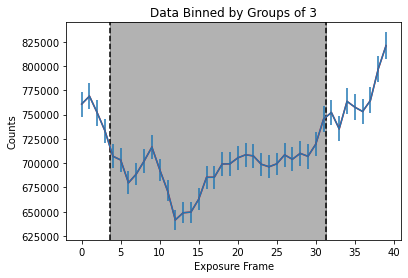

In [49]:
counts3 = []
errors3 = []
for i in range(39):
    new_index = 3*i
    one = counts[new_index]
    two = counts[new_index+1]
    three = counts[new_index+2]
    average = (one+two+three)/3
    counts3.append(average)
    err1 = errors[new_index]
    err2 = errors[new_index+1]
    err3 = errors[new_index+2]
    new_err = ((err1**2 + err2**2 + err3**2)/3)**.5
    errors3.append(new_err)
final_counts3 = (counts[-1] + counts[-2]) / 2
counts3.append(final_counts3)
final_errors3 = ((errors[-1]**2 + errors[-2]**2)/2)**.5
errors3.append(final_errors3)
x3 = np.arange(len(counts3))

fig, ax = plt.subplots()
ax.axvline(11/3, linestyle="dashed", color="black")
ax.axvline(94/3, linestyle="dashed", color="black")
ax.axvspan(11/3, 94/3, color="black", alpha=0.3)
ax.plot(x3, counts3, color="red");
ax.errorbar(x3, counts3, yerr=errors3)
ax.set_xlabel("Exposure Frame")
ax.set_ylabel("Counts");
ax.set_title('Data Binned by Groups of 3');

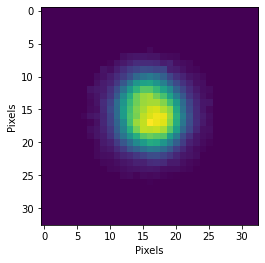

In [166]:
pix_length = 15
box_dim = int(pix_length+1)
subset = np.copy(red_science[y_center-box_dim:y_center+box_dim+1, x_center-box_dim:x_center+box_dim+1])
for i in range(box_dim*2+1):
        for j in range(box_dim*2+1):
            radius = (abs(i-box_dim)**2 + abs(j-box_dim)**2)**.5
            if radius > 10:
                subset[i,j]=0
            #elif radius < 14 and radius > 5:
            #    subset[i,j] = 0
            #else:
             #   subset[i,j] = 1
            
plt.imshow(subset)
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

In [177]:
print(gain)

4.81
